<a href="https://colab.research.google.com/github/sebastianmunozvasq/Portfolio-SMV/blob/Problems-with-initial-and-boundary-values/Emergency_Protocol_for_Uncontrolled_Nuclear_Fusion_Reaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Emergency Protocol for Uncontrolled Nuclear Fusion Reaction


Imagine you are working at Los Alamos National Laboratory on a project to obtain unprecedented amounts of energy through nuclear fusion. You are in charge of the experimental safety protocol in the event of an uncontrolled nuclear reaction. In particular, you are asked to design a heat mitigation system in case of an uncontrolled nuclear reaction.

Figure shows a sphere of 16 cm radius containing 1 kg of Deuterium-Tritium mixture. From a new gravitational field technology, the experimentalists claim that they succeeded in realizing a controlled fusion reaction at 600°C. However, if the cooling fails, the temperature of the sphere will increase as a result of the fusion reaction.






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


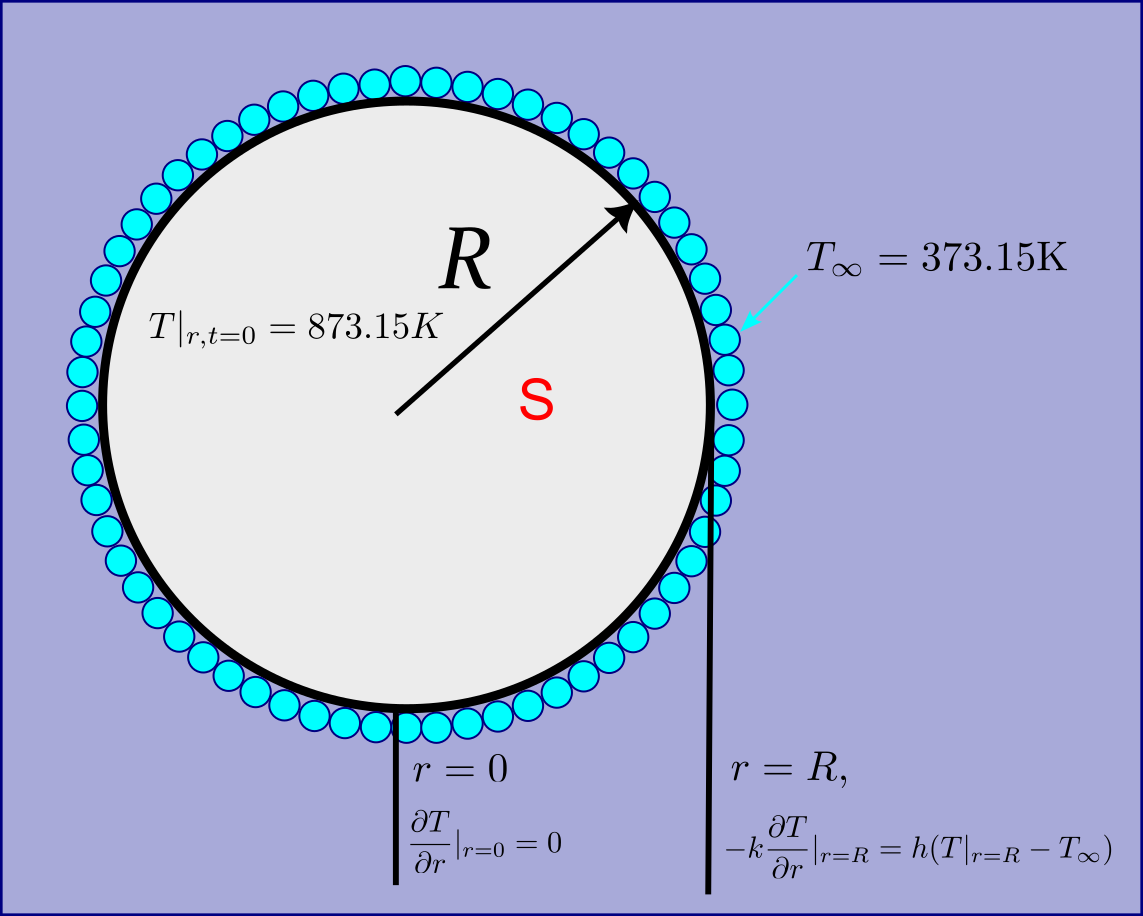

In [95]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import Image, display

# Define the path of your image in Google Drive
imagen_path = '/content/drive/My Drive/fig1_DT_TP4.png'
display(Image(filename=imagen_path, width=500, unconfined=True))

This temperature increase is very rapid and can be modeled as a volumetric heat generation term:

$$ S = 1 \text{ MW}/\text{m}^3 $$

If the temperature reaches 1100°C, the fusion will become uncontrolled and the entire national laboratory along with all its personnel would disintegrate within seconds.

The energy conservation equation inside the sphere is

$$ \rho_1 \hat{c}_{p}\frac{\partial T}{\partial t} = \frac{k}{r^2} \frac{\partial}{\partial r} \left(r^2 \frac{\partial T}{\partial r} \right) + S, \hspace{2cm} 0 < r < R_1 $$

At $r=0$, the temperature profile is symmetric, which translates into the following boundary condition:

$$ \frac{\partial T}{\partial r}|_{r=0} = 0 $$

The current safety protocol involves placing the sphere into a very large receptacle filled with ice water.
In an emergency, this would cause the sudden evaporation of the water adjacent to the sphere.
At $r=R$, there is surface cooling of the sphere due to film evaporation.
This translates into the following boundary condition:

$$ -k \frac{\partial T}{\partial r}|_{r=R} = h(T|_{r=R} - T_\infty) $$

The current system is configured with the following thermophysical properties:

##### Porous Composite Material Sphere with Deuterium-Tritium:
* Thermal conductivity: $ k_1 = 10 \text{ W/mK}$
* Specific heat capacity: $\hat{c}_p = 900 \text{ J/kg/°C}$
* Density can be calculated from experimental data
* Initial conditions: $T(t=0) = 873.15 K $

##### Heat Transfer
* Boiling temperature of water at atmospheric pressure: $T_{\infty} = 373.15 K$
* Phase change heat transfer coefficient: $h = 10000 \text{ W}/\text{m}^2/\text{K}$

You are asked to evaluate if the safety system is sufficient to prevent the temperature at any point and time from exceeding 1100°C.

#### Part 1. Discretize the PDE using second order finite differences and the FTCS method.

#### 1.1 Discretize the interior nodes using:
* Forward finite differences of first order in time for the temporal derivative
* Central finite differences of second order in space for the spatial derivatives


#### 1.2 Find the coefficients of the matrix A in the evolution equation

#### 1.3 Discretize the boundary conditions
* Use forward or backward finite differences of second order as appropriate.
* It is recommended to solve for the temperatures of the initial node $T^{t+1}_0$ and the final node $T_N^{t}$ in terms of the adjacent nodes.
* This will allow you to implement the method more easily.
* In this implementation, you should leave the first and last rows of the coefficient matrix A empty, as well as the first and last elements of the vector $\mathbf{b}$ empty.


### Part 2) Implementation of the Numerical Method


#### 2.1 - Import modules


In [96]:
# Cálculos numéricos
import numpy as np

# Gráficos
import matplotlib.pyplot as plt

# Mapas de colores
from matplotlib import cm

#### 2.2 Declaration of physical parameters


* Define the thermophysical properties of the problem
* Calculate the density of the inner sphere
* Calculate the thermal diffusivity


In [97]:
R = 0.16  # Radius of the sphere in meters
V = (4/3) * np.pi * R**3  # Volume of the sphere
m = 1  # Mass of the sphere in kg
rho = m / V  # Density of the sphere
k = 10  # Thermal conductivity in W/mK
c_p = 900  # Specific heat in J/kg/K
S = 1e6  # Heat source in W/m^3
h = 10000  # Heat transfer coefficient in W/m^2/K
T0 = 873.15  # Initial temperature in K
T_inf = 373.15  # Heat sink temperature in K


# Calculate thermal diffusivity
alpha = k / (rho * c_p)  # Thermal diffusivity


#### 2.3 Definition of grid and computational parameters

You are asked to solve the problem considering the following parameters:

* 100 nodes in the radial direction
* A time step corresponding to a computational Fourier number of 0.45,
$$\text{Fo}_c = 0.45$$


In [98]:
Nr = 100  # Number of spatial nodes

T_max_allowed = 1100

# Create a discretized domain
r = np.linspace(0, R, Nr)  # Radial domain from 0 to R (0.16 meters)
dr = r[1] - r[0]  # Spatial step
Fo_c = 0.45  # Computational Fourier number
dt = Fo_c * dr**2 / alpha  # Time step

# Construct matrix A and right-hand side vector
A = np.zeros((Nr, Nr))
b = np.zeros(Nr)

# Boundary condition at r = 0
A[0, 0] = 1
A[0, 1] = -1
b[0] = 0

# Boundary condition at r = R
A[-1, -1] = k / dr + h
A[-1, -2] = -k / dr
b[-1] = h * T_inf


#### 2.4 Fill matrix A - interior nodes

In [99]:
# Iteration over interior nodes
for i in range(1, Nr - 1):
    A[i, i - 1] = k / (rho * c_p * dr**2) - k / (rho * c_p * 2 * r[i] * dr)
    A[i, i] = -2 * k / (rho * c_p * dr**2)
    A[i, i + 1] = k / (rho * c_p * dr**2) + k / (rho * c_p * 2 * r[i] * dr)
    b[i] = S / (rho * c_p)


#### 2.5 - Define FTCS parameters


In [100]:
# Initial integration time
t_initial = 0 # seconds

# Final integration time: must be adequate to answer the questions in the statement.
t_final = 5 # seconds (adjustable)

# Record the results after a fraction of your choice. For example, t = 3 s:
record_interval = 1 # seconds to record results.


#### 2.6 Implement the FTCS algorithm

In [101]:
## FTCS Algorithm

# It is suggested that you define a function, but it is not strictly necessary

# Function definition
def FTCS(A, b, t_initial, t_final, record_interval):
    time_results = []
    t_current = t_initial
    T = np.ones(Nr) * T0
    T_copy = np.copy(T)
    T_max_history = T0
    temperature_results = []

    while t_current < t_final:
        T_new = T + dt * (np.dot(A, T) + b)
        t_current += dt
        T_new[0] = T_new[1]  # Boundary condition at r = 0
        T_new[-1] = (k * T_new[-2] + h * dr * T_inf) / (k + h * dr)  # Boundary condition at r = R
        T_max_current = np.max(T_new)

        # Check if the maximum temperature exceeds the allowed limit
        if T_max_current >= T_max_allowed:
            print(f"Maximum temperature exceeded: {T_max_current} K. Ending simulation.")
            break

        if T_max_current > T_max_history:
            T_max_history = T_max_current
            time_results.append(t_current)
            temperature_results.append(np.copy(T_new))

        T = np.copy(T_new)

        if t_current % record_interval < dt:
            time_results.append(t_current)
            temperature_results.append(np.copy(T))

    return time_results, temperature_results, T_max_history


### Quiz questions

#### P1) Calculate the temperature in K at the center of the sphere after 5 seconds of initiating the safety protocol


In [102]:
# Solve the iteration for 5 seconds
t_final = 5
(time_results, temperature_results, T_max_history) = FTCS(A, b, t_initial, t_final, record_interval)

# Print the temperature at the center of the sphere
# Temperature at the center of the sphere
print(f"Temperature at the center of the sphere at 5 seconds: {temperature_results[-1][0]} K")


Temperature at the center of the sphere at 5 seconds: 967.372110123629 K


#### P2) Find the heat flux in W removed from the sphere by the heat sink after 24 seconds of initiating the safety protocol


Calculate the heat flux removed from the sphere at 24 seconds:


$$\dot{Q} = 4 \pi R^2 h (T|_{N_R}(t=24 s)-T_{\infty}) $$

In [103]:
# Solve for 24 seconds
t_final = 24
(time_results, temperature_results, T_max_history) = FTCS(A, b, t_initial, t_final, record_interval)

# Extract the wall temperature
print(f"Wall temperature at 24 seconds: {temperature_results[-1][-1]} K")

# Calculate and print the heat flux after 24 seconds
heat_flux = 4 * np.pi * R**2 * h * (temperature_results[-1][-1] - T_inf)
print(f"Heat flux removed from the sphere at 24 seconds: {heat_flux} W")


Wall temperature at 24 seconds: 381.368027581205 K
Heat flux removed from the sphere at 24 seconds: 26437.319757938723 W


#### P3 and P4) Find the maximum temperature of the sphere and the time at which this temperature is reached

Suggestions:
* For your calculations, consider a sufficiently long simulation time to ensure that the temperature profile reaches a steady state.
* Modify the FTCS iteration to store the maximum temperature at a given time and the time at which it occurs.


In [104]:
# Solve for a sufficiently long time based on the temperature profiles
t_final = 200

def FTCS_v2(A, b, t_initial, t_final, record_interval):
    # List to accumulate times where temperature profiles are recorded
    time_results = []
    t_current = t_initial

    # Initialize vector containing the initial temperature of the sphere
    T = np.ones(Nr) * T0

    # Copy the temperature T into another variable using np.copy()
    T_copy = np.copy(T)

    # Initialize maximum temperature
    T_max_history = T0
    T_max_time = t_initial

    # List with temperature profiles for each record_interval
    temperature_results = []

    # Evolution iteration
    while t_current < t_final:
        # Update interior nodes
        T_new = T + dt * (np.dot(A, T) + b)

        # Update time
        t_current += dt

        # Update boundary conditions
        T_new[0] = T_new[1]  # Apply boundary condition at r = 0 (radial symmetry)
        T_new[-1] = (k * T_new[-2] + h * dr * T_inf) / (k + h * dr)  # Apply boundary condition at r = R

        # Calculate the maximum temperature at the current time
        T_max_current = np.max(T_new)

        # Save temperature and time if it exceeds the historical maximum temperature
        if T_max_current > T_max_history:
            T_max_history = T_max_current
            T_max_time = t_current
            time_results.append(t_current)
            temperature_results.append(np.copy(T_new))

        # Create a copy of the new temperature
        T = np.copy(T_new)

        # Define a flow control to save the temperature profile
        # each time a previously defined time interval is reached
        if t_current % record_interval < dt:
            # Save the temperature profile
            time_results.append(t_current)
            # Save the temperature
            temperature_results.append(np.copy(T))

    # Parameters to return (if defining a function)
    return time_results, temperature_results, T_max_history, T_max_time

(time_results, temperature_results, T_max_history, T_max_time) = FTCS_v2(A, b, t_initial, t_final, record_interval)
print(f"Maximum temperature of the sphere: {T_max_history} K")
print(f"Time at which maximum temperature is reached: {T_max_time} s")


Maximum temperature of the sphere: 1051.7685078619606 K
Time at which maximum temperature is reached: 18.305695740179814 s


### P5) Calculate the average temperature after 3600 s

Suggestion: Remember that the average of a scalar function in cylindrical coordinates is:


$$ \left\langle T\right\rangle=\frac{\int_{0}^{2\pi}\int_{0}^{\pi}\int_{0}^{R}{T\left(r\right)r^2drd\theta d\varphi}}{\int_{0}^{2\pi}\int_{0}^{\pi}\int_{0}^{R}{r^2drd\theta d\varphi}} $$

In [105]:
# Solve for 60 seconds
t_final = 60
(time_results, temperature_results, T_max_history) = FTCS(A, b, t_initial, t_final, record_interval)

# Calculate the average temperature after one hour using the trapezoidal method or similar

from scipy.integrate import trapezoid

# Define the function that returns the average temperature
def average_temperature_sphere(T, r):
    # Calculate the numerator using the trapezoidal rule
    numerator = trapezoid(T * r**2, r)

    # Calculate the denominator analytically
    denominator = R**3 / 3

    # Calculate the average temperature
    T_avg = numerator / denominator

    return T_avg

T_avg = average_temperature_sphere(temperature_results[-1], r)
print(f"Average temperature of the sphere after 60 s: {T_avg} K")


Average temperature of the sphere after 60 s: 639.2649422312178 K
